In [39]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [41]:
def init_s(circuit, qubits):
    for qubit in qubits:
        circuit.h(qubit)
    
    return circuit


In [61]:
n = 3
circuit = QuantumCircuit(n+1, n)
circuit = init_s(circuit, [0, 1, 2])

circuit.x(3)
circuit.h(3)

circuit.barrier()

circuit.x(0)
circuit.mct(list(range(n)), n)
circuit.x(0)

circuit.barrier()
for i in range(n):
    circuit.measure(i, i)

circuit.draw()

┌───┐      ░ ┌───┐     ┌───┐ ░ ┌─┐      
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░─┤M├──────
     ├───┤      ░ └───┘  │  └───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░────────■────────░──╫─┤M├───
     ├───┤      ░        │        ░  ║ └╥┘┌─┐
q_2: ┤ H ├──────░────────■────────░──╫──╫─┤M├
     ├───┤┌───┐ ░      ┌─┴─┐      ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░──────┤ X ├──────░──╫──╫──╫─
     └───┘└───┘ ░      └───┘      ░  ║  ║  ║ 
c: 3/════════════════════════════════╩══╩══╩═
                                     0  1  2

{'001': 130, '010': 122, '100': 138, '000': 145, '011': 121, '101': 130, '111': 114, '110': 124}


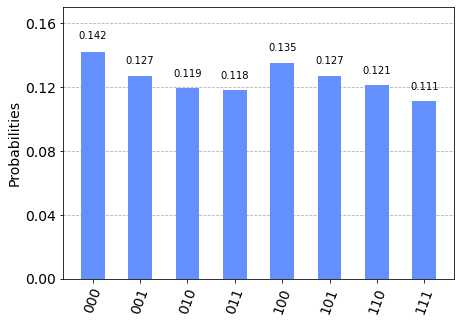

In [62]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)

result = job.result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)


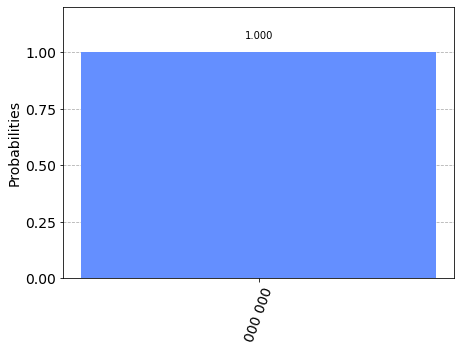

In [21]:
grover_circuit.measure_all()

simulator = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)